In [1]:
import tensorflow as tf

In [2]:
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [4]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [6]:
# Construct a linear model
pred = tf.add(tf.mul(X, W), b)

In [7]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.099752098 W= 0.33408 b= 0.193675
Epoch: 0100 cost= 0.097118102 W= 0.329055 b= 0.229824
Epoch: 0150 cost= 0.094788536 W= 0.324329 b= 0.263822
Epoch: 0200 cost= 0.092728212 W= 0.319884 b= 0.295798
Epoch: 0250 cost= 0.090906009 W= 0.315704 b= 0.325873
Epoch: 0300 cost= 0.089294493 W= 0.311772 b= 0.354159
Epoch: 0350 cost= 0.087869287 W= 0.308074 b= 0.380763
Epoch: 0400 cost= 0.086608879 W= 0.304596 b= 0.405785
Epoch: 0450 cost= 0.085494235 W= 0.301325 b= 0.429318
Epoch: 0500 cost= 0.084508516 W= 0.298248 b= 0.451451
Epoch: 0550 cost= 0.083636791 W= 0.295354 b= 0.472269
Epoch: 0600 cost= 0.082865931 W= 0.292633 b= 0.491848
Epoch: 0650 cost= 0.082184285 W= 0.290073 b= 0.510262
Epoch: 0700 cost= 0.081581503 W= 0.287665 b= 0.527581
Epoch: 0750 cost= 0.081048481 W= 0.285401 b= 0.543871
Epoch: 0800 cost= 0.080577187 W= 0.283271 b= 0.559192
Epoch: 0850 cost= 0.080160439 W= 0.281268 b= 0.573602
Epoch: 0900 cost= 0.079791918 W= 0.279384 b= 0.587155
Epoch: 0950 cost= 0.079466119

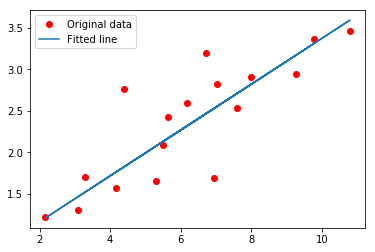

In [9]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()